In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import io

# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [ ]:

fed = pd.read_csv("data/tennis.csv")

group1 = fed.groupby(["player1 name"])["player1 total points total"].mean()
group2 = fed.groupby(["player2 name"])["player2 total points total"].mean()

p1_points = pd.DataFrame(group1)
p1_points = p1_points.reset_index(drop=True)

p2_points = pd.DataFrame(group2)
p2_points = p2_points.reset_index(drop=True)

t = pd.DataFrame()
arr = []

for i in range(len(p2_points)):
    arr.append(p1_points.loc[0, "player1 total points total"] > p2_points.loc[i, "player2 total points total"])
    
t["points"] = arr
print(t.points.value_counts())
print("Based on the fact he has a higher average most of the time, I would say he does score more points on average in a game")

# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

In [ ]:
df.head()

In [ ]:
df.corr()

In [ ]:
df = pd.read_csv("data/college.csv")

# I just copy pasted the code from normaltest
a = df.Accept
b = df.Enroll
x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 5e-2
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

1) I compared Apps to Accept, Apps to Enroll, and Accept to Enroll. All 3 times the null hypothesis is rejected
2) They are simply correlational data
3) 
    - Apps to Accept: 0.943451
    - Apps to Enrol: 0.846822
    - Accept to Enrol: 0.911637
4) 
    - Top25 to P.Undergrad: -0.053577
    - S.F.Ratio to Books: -0.031929
    - PhD to Personal: -0.010936

### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

In [ ]:
sns.boxplot(data=df, x="Private", y="Outstate");

# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

In [194]:
# received help from Jasleen

with open('data/auto.csv', 'r') as f:
    lines = f.readlines()

data = io.StringIO("".join([row for row in lines]))
df = pd.read_csv(data, delim_whitespace = True)
df = df[1:].reset_index(drop = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


Yes they have We can see a trend of cars improving over time


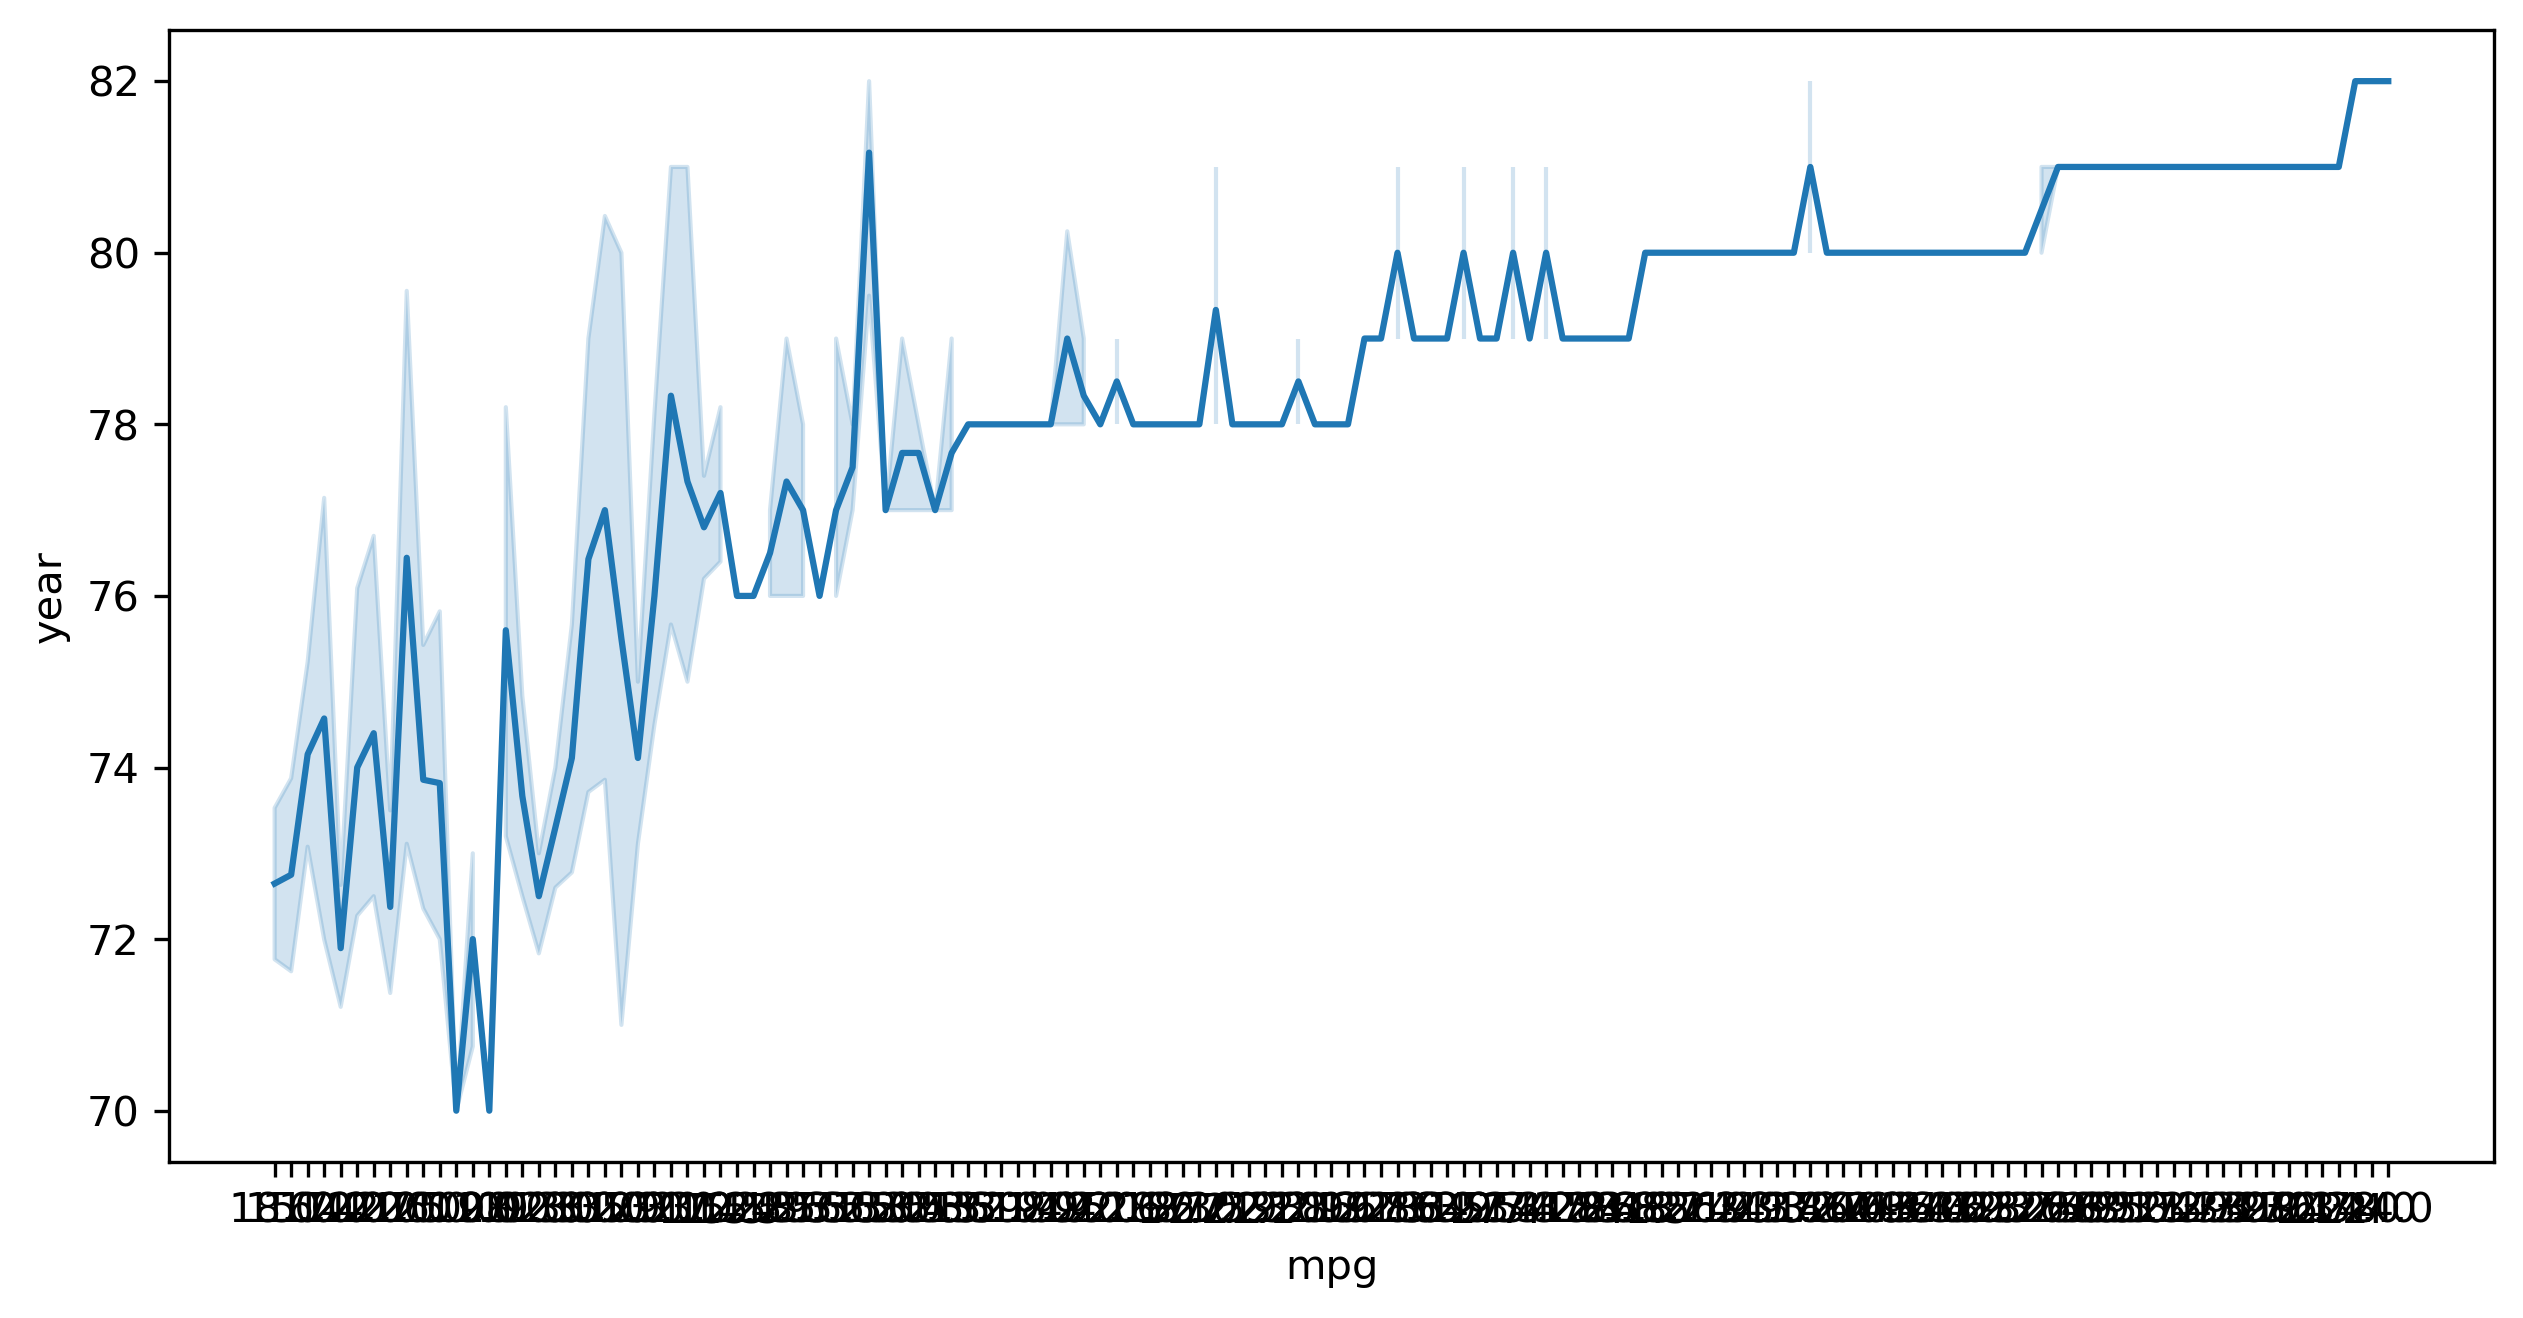

In [216]:
# can't get the X to split...
plt.figure(figsize=(10,5), dpi=300);

sns.lineplot(data=df, y="year", x="mpg")
# sns.scatterplot(data=df, y="year", x="mpg")

print("Yes they have We can see a trend of cars improving over time with less deviation too")

### 3.2 Auto Statistics

What is the mean, median and standard deviation of each quantitative feature?


In [187]:
df.describe()

,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 3.3 data removal

Remove the 10th through 85th observations. 

Does the mean statistically significantly change for each of the columns?



In [188]:
df = df.drop([10, 85]).reset_index(drop=True)

In [189]:
print("The mean has barely changed, we can claim that the columns were not statistically significant")
df.describe()

,cylinders,displacement,weight,acceleration,year,origin
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,5.445570,192.656962,2965.901266,15.576203,76.017722,1.577215
std,1.696203,103.905655,847.608812,2.739621,3.683850,0.803537
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,102.500000,2221.500000,13.900000,73.000000,1.000000
50%,4.000000,146.000000,2795.000000,15.500000,76.000000,1.000000
75%,8.000000,261.000000,3607.000000,17.150000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

In [316]:
# received a little help from Jasleen understanding load_boston()

from sklearn.datasets import load_boston
df = pd.DataFrame(data=load_boston()['data'], columns=load_boston()["feature_names"])
print("The CRIM column is associated to per capita crime rate")
print("The most correlated to CRIM is RAD (access to radial highways) and the least correlated is CHAS (dummy variable)")
print("This shows that the dummy variable offers no input on the CRIM stats and that more urban areas are more correlated to crime")
df.corr()

The CRIM column is associated to per capita crime rate
The most correlated to CRIM is RAD (access to radial highways) and the least correlated is CHAS (dummy variable)
This shows that the dummy variable offers no input on the CRIM stats and that more urban areas are more correlated to crime


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




In [245]:
print("There are 150 towns in Boston that have a crime rate of at least 2 per capita")
df.loc[df.CRIM >= 2]

There are 150 towns in Boston that have a crime rate of at least 2 per capita


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29
145,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80
146,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
485,3.67367,0.0,18.10,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98


In [249]:
print("There are 201 towns in Boston with a pupil-teacher ratio of at least 20 pupils per teacher")
df.loc[df.PTRATIO >= 20]

There are 201 towns in Boston with a 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### 4.3 How many of the suburbs in this data set bound the Charles river?

In [251]:
print("35 suburbs bound the Charles river")
len(df.loc[df.CHAS > 0])

35

### 4.4 What is the median pupil-teacher ratio among the towns in this data set?

In [254]:
print("The median is 19.050000")
df.describe()

The median is 19.050000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



In [318]:
df["MEDV"] = load_boston()["target"]

In [321]:
print("Suburb #", df.MEDV.idxmin())

Suburb # 398


### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.




In [277]:
print("More than 7: ", len(df.loc[df.RM > 7]))
print("More than 8: ", len(df.loc[df.RM > 8]))
print("The suburbs that have on average more than 8 rooms per dwelling represent only 2.6% of the entire city of Boston")

More than 7:  64
More than 8:  13
The suburbs that have on average more than 8 rooms per dwelling represent only 2.6% of the entire city of Boston
